In [7]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append("/content/drive/MyDrive/fairness_discrepancy")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import utils as ut
from prep_adult_data import *
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
def test_data(data_size):
    X, y, x_control = load_adult_data(data_size)
    ut.compute_p_rule(x_control["sex"], y)
    
    train_fold_size = 0.7
    x_train, y_train, x_control_train, x_test, y_test, x_control_test = \
                                    ut.split_into_train_test(X, y, x_control, train_fold_size)
    
    svc = svm.SVC(kernel='rbf')
    svc.fit(x_train, y_train)
    
    y_train_predicted = svc.predict(x_train)
    # print("train predictions: ", y_train_predicted)
    train_accuracy = accuracy_score(y_train, y_train_predicted)
    print("training accuracy: ", train_accuracy)
    print("orig p_rule training: ", ut.compute_p_rule(x_control_train["sex"], y_train))
    print("p-rule training: ", ut.compute_p_rule(x_control_train["sex"], y_train_predicted))
    
    y_test_predicted = svc.predict(x_test)
    # print("test predictions: ", y_test_predicted)
    test_accuracy = accuracy_score(y_test, y_test_predicted)
    print("test accuracy: ", test_accuracy)
    print("orig p_rule testing:", ut.compute_p_rule(x_control_test["sex"], y_test))
    print("p-rule testing: ", ut.compute_p_rule(x_control_test["sex"], y_test_predicted))
    return train_accuracy, test_accuracy

In [10]:
data_sizes = np.linspace(start=10000 , stop= 45222, num= 10)

In [11]:
train_accuracies = []
test_accuracies = []

In [12]:
for data_size in data_sizes:
    train_accuracy, test_accuracy = test_data(int(data_size))
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print('--------------------------------------')
    print('--------------------------------------')

Looking for file 'adult.data' in the current directory...
File found in current directory..
Looking for file 'adult.test' in the current directory...
File found in current directory..
Loading only 10000 examples from the data
Total data points: 10000
# non-protected examples: 6786
# protected examples: 3214
Non-protected in positive class: 2110 (31%)
Protected in positive class: 364 (11%)
P-rule is: 36%
training accuracy:  0.8011428571428572
Total data points: 7000
# non-protected examples: 4752
# protected examples: 2248
Non-protected in positive class: 1467 (31%)
Protected in positive class: 264 (12%)
P-rule is: 38%
orig p_rule training:  38.041176342160995
Total data points: 7000
# non-protected examples: 4752
# protected examples: 2248
Non-protected in positive class: 491 (10%)
Protected in positive class: 114 (5%)
P-rule is: 49%
p-rule training:  49.07987910502932
test accuracy:  0.799
Total data points: 3000
# non-protected examples: 2034
# protected examples: 966
Non-protected i

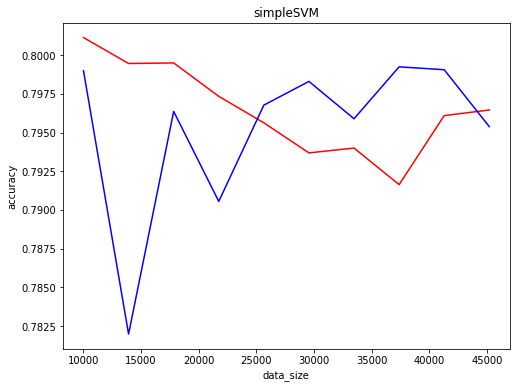

In [13]:
plt.figure(figsize=(8,6))
plt.title('simpleSVM')
plt.xlabel('data_size')
plt.ylabel('accuracy')
plt.plot(data_sizes.astype(int), train_accuracies, 'r-', data_sizes.astype(int), test_accuracies, 'b-')

In [14]:
plt.savefig('simpleSVM.png', bbox_inches='tight', dpi=10)

<Figure size 432x288 with 0 Axes>

In [15]:
print(train_accuracies)
print(test_accuracies)

[0.8011428571428572, 0.7994660642776465, 0.7995031653177338, 0.797345249047181, 0.7956342577124401, 0.7936899067497705, 0.794000938686692, 0.7916411980440098, 0.7960990455111357, 0.7964618543673985]
[0.799, 0.781983708672736, 0.7963724756918474, 0.7905550444648881, 0.7967775467775468, 0.7983089064261556, 0.7958980485862206, 0.7992512034230701, 0.7990639122014203, 0.7953858627552148]
